# Skript: 06_00_scikit-learn_sklearn_iris_Datensatz


### Lernziele:

- scikit-learn-Bibliothek
- Zugriff auf die Beispieldatensätze in einer Bibliothek
- Anzeigen einzelner Merkmale der Beispiel-Datensätze
- Split in Trainings- / Testdate-Sätze
- Erkennen von Verteilungen udn Korrelationen mit Pairplot


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###
Laden von Beispieldatensätzen

Es gibt eine Reihe von Beispieldatensätzen, die über das Untermodul "datasets" geladen werden können

In [1]:
from sklearn import datasets
# hier werden 2 Beispieldatensätze gelesen
iris = datasets.load_iris()
digits = datasets.load_digits()


Hinter dem Objekt *datasets* verbergen sich viele Beispieldatensätze.  
Man kann sie sich durch den nachgestellten Punkt und der TAB-Taste anzeigen lassen.

In [ ]:
datasets.

### IRIS-Datensatz

In [2]:
from sklearn.datasets import load_iris
iris_dataset  = load_iris()
print("Type des neuens Objektes: \n", type(iris_dataset))      #  -> class 'sklearn.utils.Bunch'
print()


Type des neuens Objektes: 
 <class 'sklearn.utils.Bunch'>



Die Disctionary-Struktur mit der keys-Eigenschaft auslesen

In [4]:
print("Die Zugriffs-Keys des Bunch-Objektes \n", iris_dataset.keys())

Die Zugriffs-Keys des Bunch-Objektes 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
Descr oder Description liefert meist mehr Informationen

In [3]:
print("Description: \n",iris_dataset['DESCR'][:200])

Description: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


#### Analysedaten / Merkmale / Attribute betrachten 

In [5]:
print("Target-Names / Ziel-Variablen-Werte / Ziel-Klassen: \n", iris_dataset['target_names'])

Target-Names / Ziel-Variablen-Werte / Ziel-Klassen: 
 ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature-Names / Input-Variablen:   \n", iris_dataset['feature_names'])

Feature-Names / Input-Variablen:   
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Die Daten sind als Array enthalten, zunächst den Typ: \n ", type(iris_dataset['data']))

Die Daten sind als Array enthalten, zunächst den Typ: 
  <class 'numpy.ndarray'>


In [8]:
print("Wie sieht die Struktur des Arrays aus: \n", iris_dataset['data'].shape)

Wie sieht die Struktur des Arrays aus: 
 (150, 4)


In [9]:
print("Wie sehen die Daten aus- die ersten Sätze: \n{}".format(iris_dataset['data'][:5]))

Wie sehen die Daten aus- die ersten Sätze: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print("Die Ziel-Variable - zunächst den Typ:\n",type(iris_dataset['target']))

Die Ziel-Variable - zunächst den Typ:
 <class 'numpy.ndarray'>


In [11]:
print("Wie sieht die Struktur der  Ziel-Variablen aus: \n", iris_dataset['target'].shape)

Wie sieht die Struktur der  Ziel-Variablen aus: 
 (150,)


In [7]:
print("Und jetzt die Daten der Ziel-Variablen selbst: \n", iris_dataset['target'])

Und jetzt die Daten der Ziel-Variablen selbst: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Erstellen von Trainings- und Test-Daten

Die Funktion "train_test_split" teilt eine Datenmenge sehr komfortabel in 75% Trainings und 25% Testsätze (Defaut)
Der Parameter random_state=0  steht für die Wiederholbarkeit des Zufälligkeits-Vorgangs.
Konvention: X steht für die Menge der Input-Variablen und y für die Label-Inforamtion (bekannte Ziel-Variable).

In [16]:
from sklearn.datasets import load_iris
iris_dataset  = load_iris()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [5]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [6]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Suchen nach Abhängigkeiten zwischen den Input-Variablen / Pair Plot

Umwandeln in einen Pandas Data Frame zu besseren Handling der Daten.

In [18]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train

In [8]:
iris_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
sepal length (cm)    112 non-null float64
sepal width (cm)     112 non-null float64
petal length (cm)    112 non-null float64
petal width (cm)     112 non-null float64
dtypes: float64(4)
memory usage: 3.6 KB


In [19]:
iris_dataframe.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]>

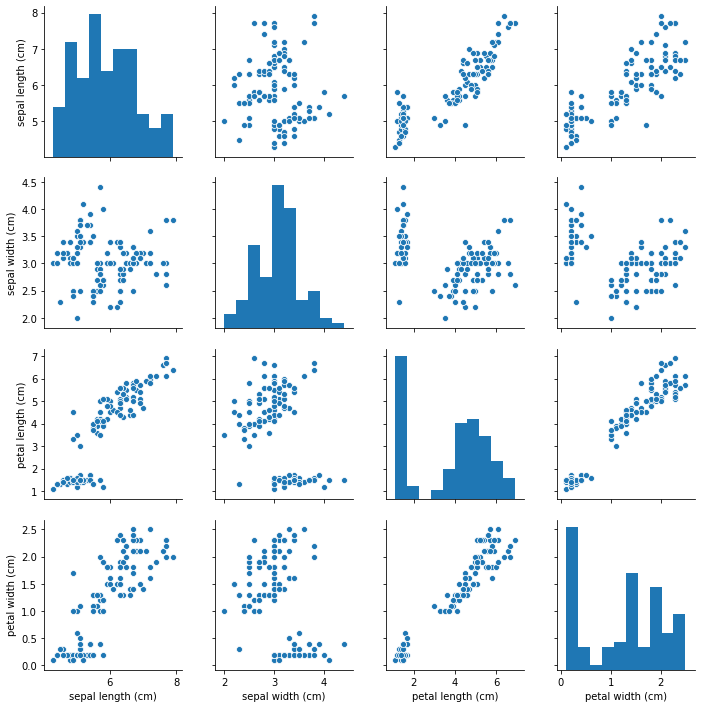

In [10]:
# Erstellen scatter matrix plot / Erkennen von Abhängigkeiten zwischen Variablen
# Welche Variablen haben Abhängigkeiten
sns.pairplot(iris_dataframe)